#Elaboração do modelo Convolucional com camada LSTM

---

##Carregamento dos dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!unzip /content/drive/MyDrive/DadosIC/BrennoDadosModelo2.zip -d /content

Archive:  /content/drive/MyDrive/ICBinla/BrennoDados.zip
replace DadosModelo2/X_concat.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: y[]
  inflating: DadosModelo2/X_concat.npy  



In [ ]:
import numpy as np
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
dir_list = os.listdir('/content/DadosModelo2')

In [ ]:
dir_list

['X_concat.npy']

In [ ]:
with open('/content/DadosModelo2/X_concat.npy', 'rb') as f:
    X = np.load(f)

In [ ]:
y = np.concatenate((np.zeros(46722), np.ones(14040)), axis=0)

##Elaboração do modelo


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

###Arquitetura do modelo

In [ ]:

model = tf.keras.models.Sequential([
                                    tf.keras.layers.InputLayer(input_shape=(250,20)),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Conv1D(15,10),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPool1D(pool_size=8,strides=1, padding='same'),
                                    tf.keras.layers.Conv1D(7,5),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPool1D(pool_size=8,strides=1, padding='same'),
                                    tf.keras.layers.LSTM(10),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = tf.keras.metrics.BinaryAccuracy(name="binary_accuracy", dtype=None, threshold=0.5)
)

history = model.fit(
    X_train,
    y_train,
    epochs = 500,
    validation_split = 0.2,
    batch_size = 32
)

Epoch 1/500
1216/1216 [==============================] - 21s 15ms/step - loss: 0.5288 - binary_accuracy: 0.7657 - val_loss: 0.5128 - val_binary_accuracy: 0.7750
Epoch 2/500
1216/1216 [==============================] - 17s 14ms/step - loss: 0.5136 - binary_accuracy: 0.7678 - val_loss: 0.5019 - val_binary_accuracy: 0.7730
Epoch 3/500
1216/1216 [==============================] - 17s 14ms/step - loss: 0.5028 - binary_accuracy: 0.7689 - val_loss: 0.4982 - val_binary_accuracy: 0.7726
Epoch 4/500
1216/1216 [==============================] - 16s 14ms/step - loss: 0.5315 - binary_accuracy: 0.7654 - val_loss: 0.5212 - val_binary_accuracy: 0.7715
Epoch 5/500
1216/1216 [==============================] - 17s 14ms/step - loss: 0.5202 - binary_accuracy: 0.7680 - val_loss: 0.5186 - val_binary_accuracy: 0.7715
Epoch 6/500
1216/1216 [==============================] - 17s 14ms/step - loss: 0.5263 - binary_accuracy: 0.7681 - val_loss: 0.5231 - val_binary_accuracy: 0.7709
Epoch 7/500
1216/1216 [===========

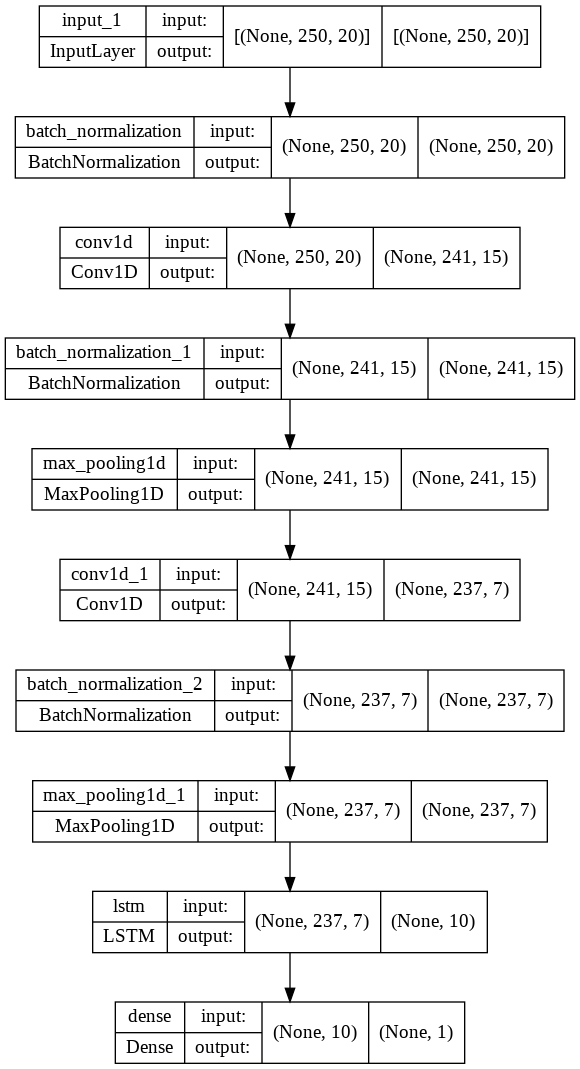

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, expand_nested=True)

##Resultados

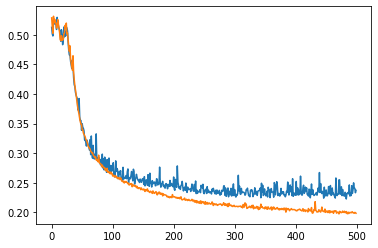

In [ ]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

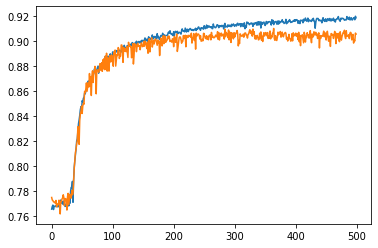

In [ ]:
    plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])

In [ ]:
model.evaluate(X_test, y_test)

380/380 [==============================] - 2s 6ms/step - loss: 0.2368 - binary_accuracy: 0.9071


[0.23683209717273712, 0.9071011543273926]

In [ ]:
probs = model.predict(X_test)
y_pred = np.zeros(probs.shape[0])
k = 0
for i in probs:
    if i[0] > 0.5:
        y_pred[k] = 1
    k += 1

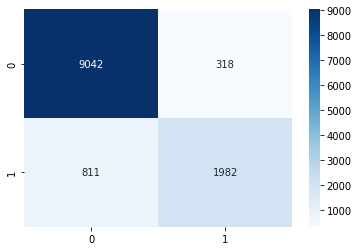

In [ ]:
cf_matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt="d")

In [ ]:

model = tf.keras.models.Sequential([
                                    tf.keras.layers.InputLayer(input_shape=(250,20)),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Conv1D(15,10),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPool1D(pool_size=8,strides=1, padding='same'),
                                    tf.keras.layers.Conv1D(7,5),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPool1D(pool_size=8,strides=1, padding='same'),
                                    tf.keras.layers.LSTM(10),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

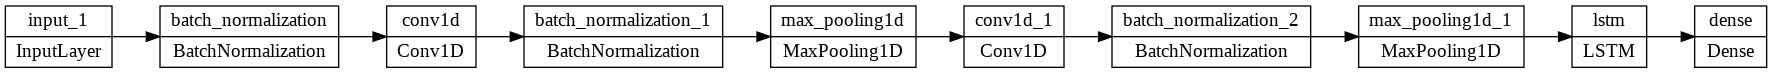

In [ ]:
tf.keras.utils.plot_model(model, rankdir='LR')